In [ ]:
#This script describes the workflow of statistical analysis used in Fig.7
###by Haikuo Li @ Humphreys Lab

In [ ]:
import pandas as pd
import math
interaction_count={}
for sample in ['Health','IRI6h','IRI2d','IRI7d','IRI14d','IRI28d','UUO2d','UUO4d','UUO6d','UUO10d','UUO14d']:
    file_path=str(sample+'/output/pvalues.txt')
    file=pd.read_csv(file_path, sep='\t')
    file2=file[colname_list]
    interaction_count[sample]=sum(file2[file2 <0.05].count())

In [9]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

In [ ]:
cellist=['Myofib',
'Fib',
'PT_Type1_Injury',
'Pod',
'PT_Repairing',
'PT_Failed_Repair',
'Immune',
'PT_Type2_Injury',
'ATL',
'PT_Health',
'DTL2',
'DTL1',
'TAL-inj',
'TAL',
'PC3',
'DCT',
'PC2',
'PT_Acute_Injury',
'JGA',
'DCT-inj',
'PC1',
'Endo',
'CNT-inj',
'CNT',
'DCT-CNT',
'IC']

In [11]:
data = pd.DataFrame(np.zeros((26, 26)),columns=cellist, index=cellist)

In [12]:
readfile=open('heatmap_plot/count_network.txt','r')
readfile.readline()
for line in readfile:
    line=line.strip().split('\t')
    if int(line[2])==0:
        data[line[0]][line[1]]=float(0)
    else:
        data[line[0]][line[1]]=float(math.log(int(line[2]),2))

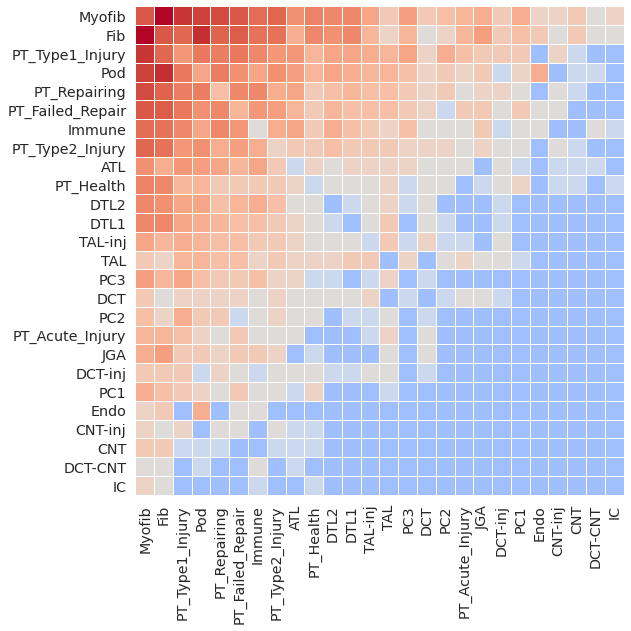

In [24]:
f, ax = plt.subplots(figsize=(9,9))
sns.set(font_scale=1.2)
ax = sns.heatmap(data, cmap='coolwarm',linewidths=.01,cbar_kws={'label': 'CCI Activity (log-transformed)'}, cbar=False,center=1.5)
plt.tight_layout()
f.savefig('give_a_name.png')

In [ ]:
##The following code provides one approach to identification of active ligand-receptor pairs in certain CCIs

interaction1='PT_Failed_Repair|Fib'
interaction2='PT_Failed_Repair|Myofib'
##find L-R pairs that appear most often in FR-Fib interactions
FR_lr_pair={}
for sample in ['Health','IRI6h','IRI2d','IRI7d','IRI14d','IRI28d','UUO2d','UUO4d','UUO6d','UUO10d','UUO14d']:
    file_path=str(sample+'/output/pvalues.txt')
    file=pd.read_csv(file_path, sep='\t')

    for i in range(len(file)):
        if file[interaction1][i]<0.05:
            if file['interacting_pair'][i] in FR_lr_pair.keys():
                FR_lr_pair[file['interacting_pair'][i]]+=1
            else:
                FR_lr_pair[file['interacting_pair'][i]]=1

    for i in range(len(file)):
        if file[interaction2][i]<0.05:
            if file['interacting_pair'][i] in FR_lr_pair.keys():
                FR_lr_pair[file['interacting_pair'][i]]+=1
            else:
                FR_lr_pair[file['interacting_pair'][i]]=1
FR_lr_pair_sort = sorted(FR_lr_pair.items(), key=lambda x: x[1], reverse=True)